In [1]:
import numpy as np
import pandas as pd

# 시각화를 위한 모듈
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 너무 많이 발생하는 경고들을 제거
import sys
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train)
print(test)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            89

In [7]:
## 데이터 분석


In [9]:
# train, test 크기 저장
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['Survived'].values
passId = test['PassengerId']

# train데이터와 test데이터 합치기
data = pd.concat((train, test))

print(f"data size is : {data.shape}")

data size is : (1309, 12)


In [11]:
# 생존자 , 사망자 수 확인
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

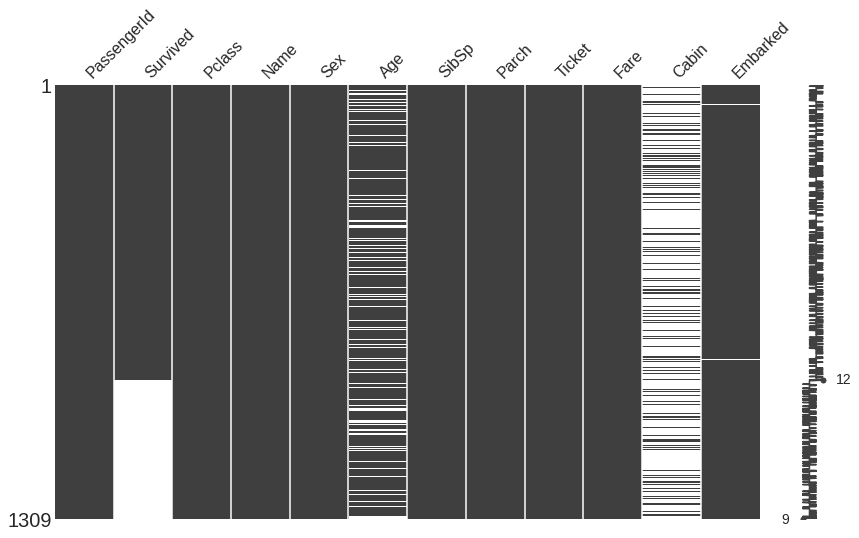

In [12]:
# 결측치 확인

missingno.matrix(data, figsize = (14,8))

In [13]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
data.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [15]:
# 변수 간 상관관계 알아보기

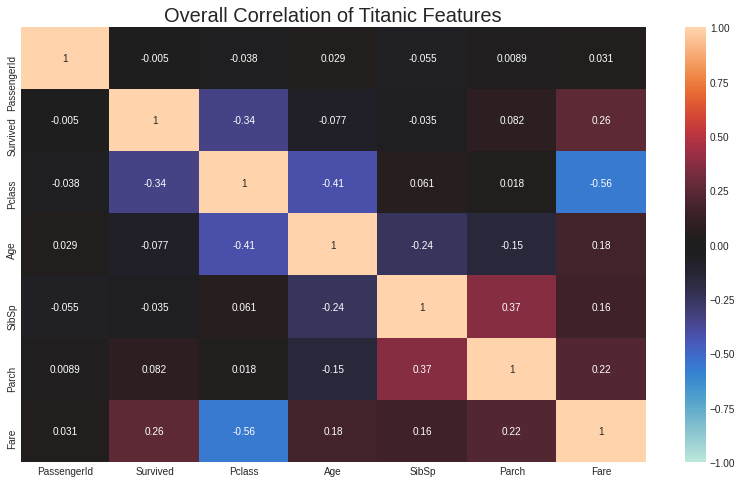

In [20]:
corr = data.corr()
plt.figure(figsize=(14, 8))
plt.title('Overall Correlation of Titanic Features', fontsize = 20)
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0)
plt.show()

In [29]:
temp = data.copy()

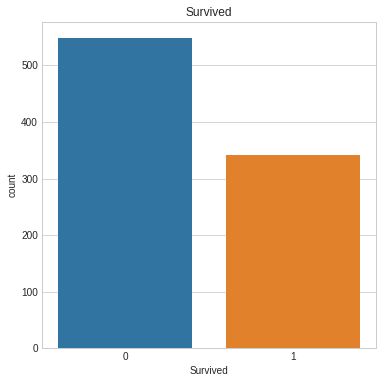

In [30]:
# survived 분포 확인

f,ax = plt.subplots(figsize = (6,6))
ax.set_title('Survived')
sns.countplot('Survived', data=train, ax=ax)
plt.show()

In [34]:
# Pcalss
# Pclass별 생존자/ 사망자 확인 수
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [35]:
# Pclass별 생존 비율 확인
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [38]:
# 빈도표 만들어서 시각적으로 확인
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

# 1등급 Pclass 승객의 생존자가 가장 많고
# 3등급 Pclass 승객의 사망자가 가장 많다

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [44]:
def plot_pct_counts(col, target, data):
  f,ax = plt.subplots(1,2,figsize=(12,5))
  data.groupby([col])[target].mean().plot(kind='bar',ax=ax[0])
  ax[0].set_title(f"{target} percent by {col}")
  sns.countplot(col, hue=target, data = data, ax=ax[1] )
  ax[1].set_title(f"{target} count by {col}")
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
  plt.show()

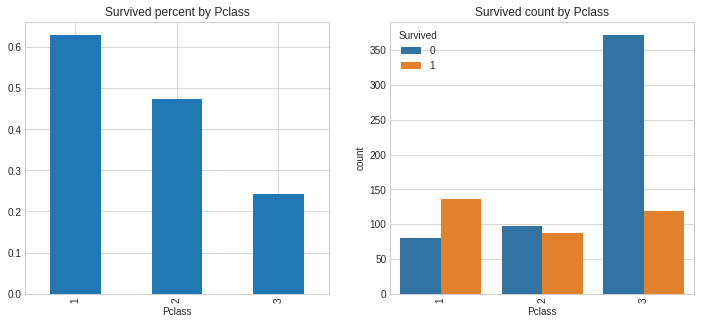

In [45]:
plot_pct_counts("Pclass","Survived",train)

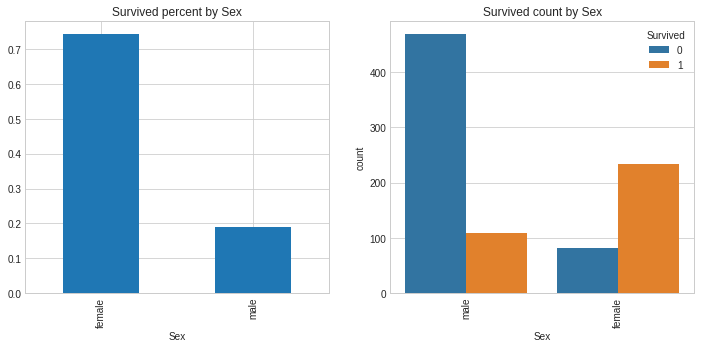

In [47]:
# 성별과 생존의 관계 확인
plot_pct_counts("Sex","Survived", train)

In [51]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

In [52]:
# "Name" 분석

In [53]:
data.Name.value_counts()

Connolly, Miss. Kate                       2
Kelly, Mr. James                           2
Karlsson, Mr. Julius Konrad Eugen          1
Maguire, Mr. John Edward                   1
Kraeff, Mr. Theodor                        1
                                          ..
Turpin, Mr. William John Robert            1
Murphy, Miss. Margaret Jane                1
Danbom, Master. Gilbert Sigvard Emanuel    1
Cacic, Mr. Luka                            1
Fortune, Mr. Charles Alexander             1
Name: Name, Length: 1307, dtype: int64

In [55]:
# 호칭 추출하기 
# 호칭으로 계급, 성별 나누기 위해

temp = data.copy()
temp["Initial"] = data.Name.str.extract('([A-Za-z]+)\.')
temp["Initial"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Capt          1
Don           1
Sir           1
Mme           1
Lady          1
Dona          1
Jonkheer      1
Countess      1
Name: Initial, dtype: int64

In [57]:
# 호칭 <-> 성별 관계 확인

pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


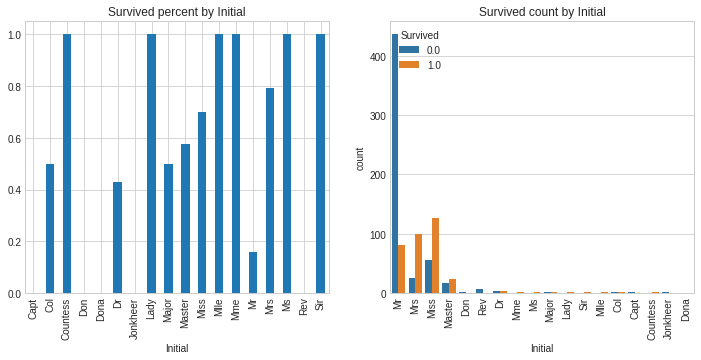

In [58]:
# 호칭과 생존간의 관계 확인

plot_pct_counts("Initial","Survived",temp)

In [66]:
# 하나씩 있는 데이터는 정보를 줄 수 없으므로 새로운 범주로 묶어주기

initial_dict = {
    "Dr":"Other",
    "Rev":"Other",
    "Col":"Other",
    "Major":"Other",
    "Ms":"Miss",
    "Don":"Mr",
    "Jonkheer":"Mr",
    "Dona":"Mrs",
    "Mlle":"Nobles",
    "Countess":"Nobles",
    "Sir":"Nobles",
    "Mme":"Nobles",
    "Capt":"Other",
    "Lady":"Nobles"
    
}

temp["Initial"].replace(initial_dict.keys(), initial_dict.values(),inplace= True)
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Nobles,Other
Sex,,,,,,
female,0,262,0,198,5,1
male,61,0,759,0,1,22


In [70]:
# Name에서 FirstName 추출하여 속성으로 만들기

temp["FirstName"] = data.Name.str.extract('^([A-Za-z]+)')
pd.crosstab(temp.FirstName, temp.Survived).T.style.background_gradient(cmap='summer_r')

In [73]:
# 수월한 데이터처리를 위해 FirstName을 숫자로 바꾸기
temp['FirstName'] = temp['FirstName'].factorize()[0]
pd.crosstab(temp.FirstName, temp.Survived).T.style.background_gradient(cmap='summer_r')

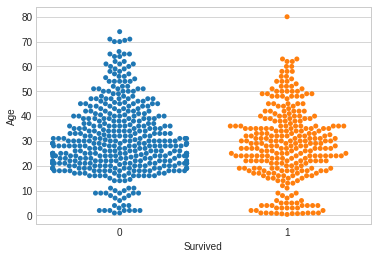

In [75]:
# Age 분석

sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

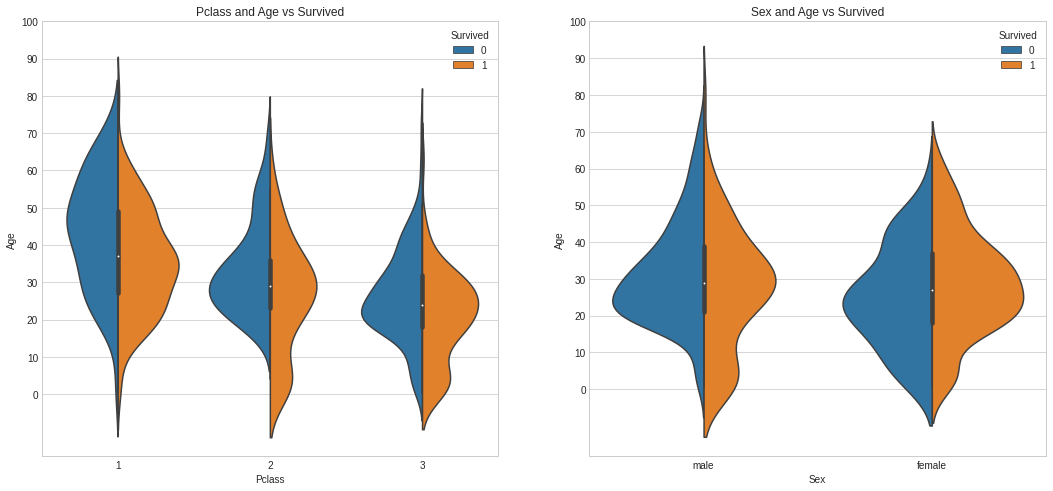

In [76]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex","Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [78]:
# Age의 결측치 채우기

temp.reset_index(inplace=True)
temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x:x.fillna(x.mean()))
temp

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,FistName,FirstName
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,Allen,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,32.275300,0,0,A.5. 3236,8.0500,NaN,S,Mr,Spector,850
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Mrs,Oliva,851
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Saether,852
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,32.275300,0,0,359309,8.0500,NaN,S,Mr,Ware,799


In [79]:
# 배에 혼자 탔는지, 혹은 가족들과 탔는지 분석
# 혼자 탔다면 "Alone"의 값을 1로 수정

temp['Alone'] = 0
temp.loc[(temp['SibSp']==0 ) & temp['Parch']==0,' Alone'] =1

In [81]:
# 가족 수 나타내는 속성값 'FamilySize'

temp['FamilySize'] = temp['SibSp'] + temp['Parch'] + 1
temp.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,FistName,FirstName,Alone,Alone,FamilySize
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0,0,1.0,2
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1,0,1.0,2
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2,0,1.0,1
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3,0,1.0,2
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,4,0,1.0,1


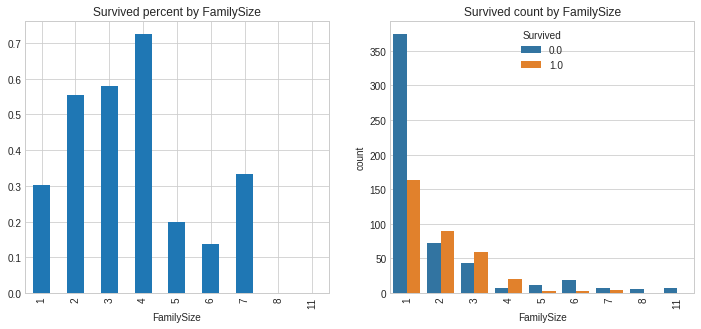

In [82]:
# 가족수와 생존률 관계 분석

plot_pct_counts('FamilySize', 'Survived', temp)

# 분석 결과
# 1) 가족 수가 4명일 때 생존률이 가장 높다
# 2) 가족 수가 5,6명일 떄의 생존률이 낮다
# 3) 혼자 탑승했을 경우의 생존률은 그다지 높지 않은 것으로 보인다.

0              A/5
1               PC
2         STON/O2.
3           113803
4           373450
           ...    
1304          A.5.
1305            PC
1306    SOTON/O.Q.
1307        359309
1308          2668
Name: Ticket, Length: 1309, dtype: object